In [39]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [40]:
# Carregando dados
ticker = "BBAS3.SA"
data = yf.Ticker(ticker).history(period="2y")

# Removendo colunas desnecessárias
del data["Dividends"]
del data["Stock Splits"]

# Limpeza de dados
data.dropna(inplace=True)

# Definindo X e y
X = data['Open'].values.reshape(-1, 1)
y = data['High'].values.reshape(-1, 1)


In [41]:
# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# # Normalização dos dados
# x_scaler = StandardScaler()
# y_scaler = StandardScaler()

# X_train_scaled = x_scaler.fit_transform(X_train)
# X_test_scaled = x_scaler.transform(X_test)  # Atenção: usar apenas transform aqui
# y_train_scaled = y_scaler.fit_transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)


In [42]:
# Implementação da Floresta Aleatória
modelo_floresta = RandomForestRegressor(n_estimators=100, random_state=0)
modelo_floresta.fit(X_train, y_train)

c:\Users\55869\OneDrive\Área de Trabalho\TRABALHO_IA\chatbot-autismo\cuda\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=0)

In [43]:
# Previsões
y_pred = modelo_floresta.predict(X_test)
y_pred

array([16.53644661, 23.33148512, 22.63756222, 27.5193195 , 24.05494718,
       15.48410697, 28.58398518, 22.39037052, 19.15868293, 18.08965568,
       24.50805483, 23.91210371, 22.81441857, 28.63358117, 17.91756081,
       22.51869243, 27.34121554, 28.26977691, 18.3015184 , 18.05244184,
       19.86589238, 26.57416661, 23.8550512 , 16.01575273, 18.09509846,
       28.54154143, 15.94006979, 27.47385654, 15.68506682, 22.51869243,
       27.509476  , 15.71775758, 15.68506682, 18.25722702, 26.33248795,
       26.20028124, 22.69969198, 27.18074202, 22.53895903, 23.53152188,
       23.45007065, 17.56273432, 26.96682789, 20.56434282, 19.14079487,
       14.5060236 , 20.48538447, 23.70949795, 28.34656121, 15.74900337,
       26.50081225, 18.3015184 , 22.52624252, 18.06970222, 15.86551851,
       15.26678865, 23.8550512 , 17.7556891 , 20.56434282, 22.26927495,
       17.8663639 , 26.57262213, 27.09234361, 27.6629099 , 22.82481311,
       20.0616894 , 15.08872713, 28.62611345, 22.40920512, 19.42

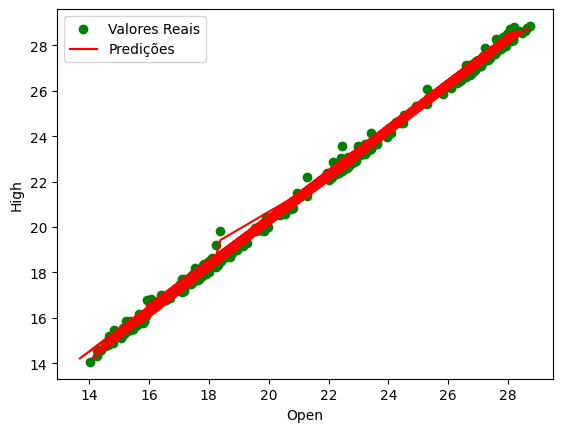

In [44]:
# Visualizando previsões
plt.scatter(X_train, y_train, color='green', label='Valores Reais')
plt.plot(X_test, y_pred, color='red', label='Predições')
plt.xlabel('Open')
plt.ylabel('High')
plt.legend()
plt.show()

In [45]:
# Avaliação do modelo
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [46]:
# Exibindo métricas
print(f"Coeficiente de Determinação (R2): {r2}")
print(f"Erro Percentual Absoluto Médio (MAPE): {mape}%")
print(f"Erro Médio Absoluto (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")

Coeficiente de Determinação (R2): 0.9978156233809699
Erro Percentual Absoluto Médio (MAPE): 0.7506593289138451%
Erro Médio Absoluto (MAE): 0.1590526775716781
Erro Quadrático Médio (MSE): 0.04436469494915962


In [47]:
# Últimos valores conhecidos
last_known_high = data.iloc[-3]['Open'].reshape(1, -1) # Último valor de 'Open' para prever o próximo 'High'

predicted_prices_high = []

# Prever os próximos 7 dias
for _ in range(3):
    next_price_high = modelo_floresta.predict(last_known_high)
    
    predicted_prices_high.append(next_price_high[0])
    
    # Atualizar last_known_prices para a próxima previsão
    last_known_high = next_price_high.reshape(1, -1)

print('Predicted prices for the next 3 days:', predicted_prices_high)

Predicted prices for the next 3 days: [np.float64(26.778820749813256), np.float64(26.897870117391996), np.float64(26.93623012549389)]
